# Analysis of heterogeneous ABM - NO NETWORK

Assumes a well-mixed heterogeneous population in which agents communicate and observe behaviour of all other agents.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.sample import sobol as sobol_sample
from SALib.analyze import sobol as sobol_analyze
from SALib.test_functions import Ishigami
import random

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_28416/619868074.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#from model import ConsumatModel
from model_heterogeneous_newdata import ConsumatModel

In [52]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1600, 
    'seed': 42  # Seed for reproducibility
}



In [53]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    # Convert model_data to a DataFrame if it's not already
    if not isinstance(model_data, pd.DataFrame):
        model_data = pd.DataFrame(model_data)
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates

    return model_data


Simulation Progress: 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


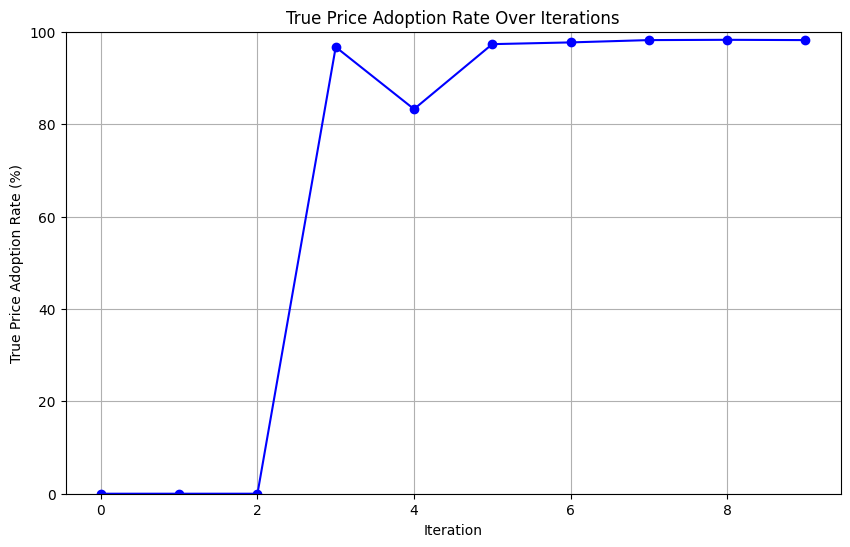

In [54]:
model = ConsumatModel(base_config)
num_steps = 10


# Assuming the model and num_steps are defined elsewhere
model_data = run_simulation(model, num_steps)

plt.figure(figsize=(10, 6))
plt.plot(model_data['Adoption Rates'], marker='o', color='b')
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


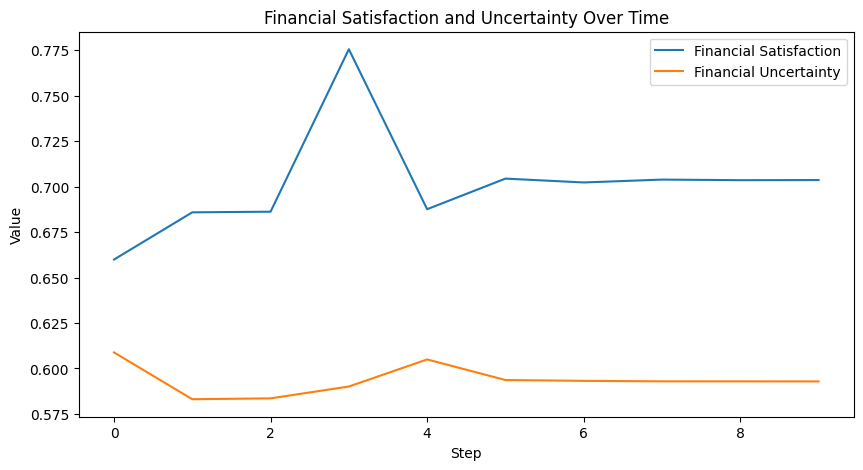

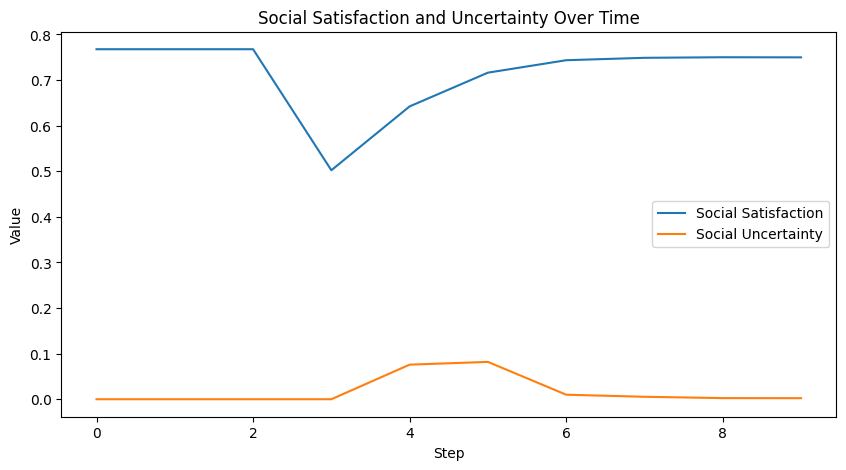

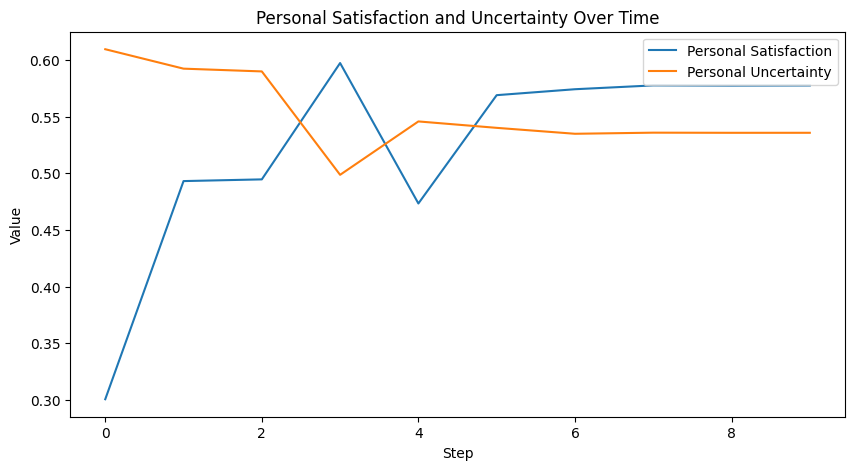

In [55]:
import matplotlib.pyplot as plt

# Plot financial satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_F_Satisfaction'], label='Financial Satisfaction')
plt.plot(model_data['Avg_F_Uncertainty'], label='Financial Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Financial Satisfaction and Uncertainty Over Time')
plt.show()

# Plot social satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_S_Satisfaction'], label='Social Satisfaction')
plt.plot(model_data['Avg_S_Uncertainty'], label='Social Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Social Satisfaction and Uncertainty Over Time')
plt.show()

# Plot personal satisfaction and uncertainty
plt.figure(figsize=(10, 5))
plt.plot(model_data['Avg_P_Satisfaction'], label='Personal Satisfaction')
plt.plot(model_data['Avg_P_Uncertainty'], label='Personal Uncertainty')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.title('Personal Satisfaction and Uncertainty Over Time')
plt.show()



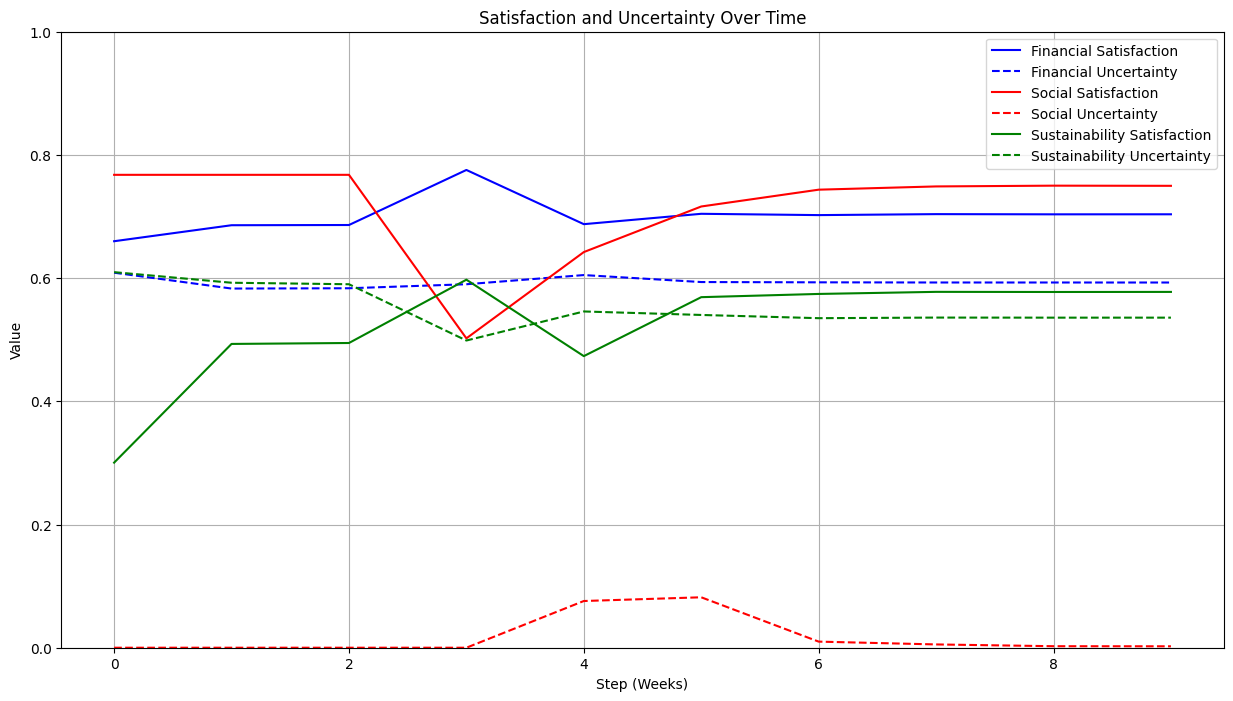

In [56]:
import matplotlib.pyplot as plt

# Create a single figure for all plots
plt.figure(figsize=(15, 8))

# Plot financial satisfaction and uncertainty with different shades of blue
plt.plot(model_data['Avg_F_Satisfaction'], label='Financial Satisfaction', color='blue', linestyle='-')
plt.plot(model_data['Avg_F_Uncertainty'], label='Financial Uncertainty', color='blue', linestyle='--')

# Plot social satisfaction and uncertainty with different shades of green
plt.plot(model_data['Avg_S_Satisfaction'], label='Social Satisfaction', color='red', linestyle='-')
plt.plot(model_data['Avg_S_Uncertainty'], label='Social Uncertainty', color='red', linestyle='--')

# Plot personal satisfaction and uncertainty with different shades of red
plt.plot(model_data['Avg_P_Satisfaction'], label='Sustainability Satisfaction', color='green', linestyle='-')
plt.plot(model_data['Avg_P_Uncertainty'], label='Sustainability Uncertainty', color='green', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Step (Weeks)')
plt.ylabel('Value')
plt.ylim(0,1)
plt.title('Satisfaction and Uncertainty Over Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


How many agents choose each strategy per step:

      Repeat  Imitate  Deliberate  Social_Compare
Step                                             
1       1259      233         108               0
2       1418      182           0               0
3       1418      182           0               0
4       1512       70          18               0
5        738      635         227               0
6        413     1173          14               0
7        117     1480           3               0
8         15     1585           0               0
9         10     1590           0               0
10        10     1590           0               0
11        10     1590           0               0
12        10     1590           0               0
13        10     1590           0               0
14        10     1590           0               0
15        10     1590           0               0
16        10     1590           0               0
17        10     1590           0               0
18        10     1590           0               0


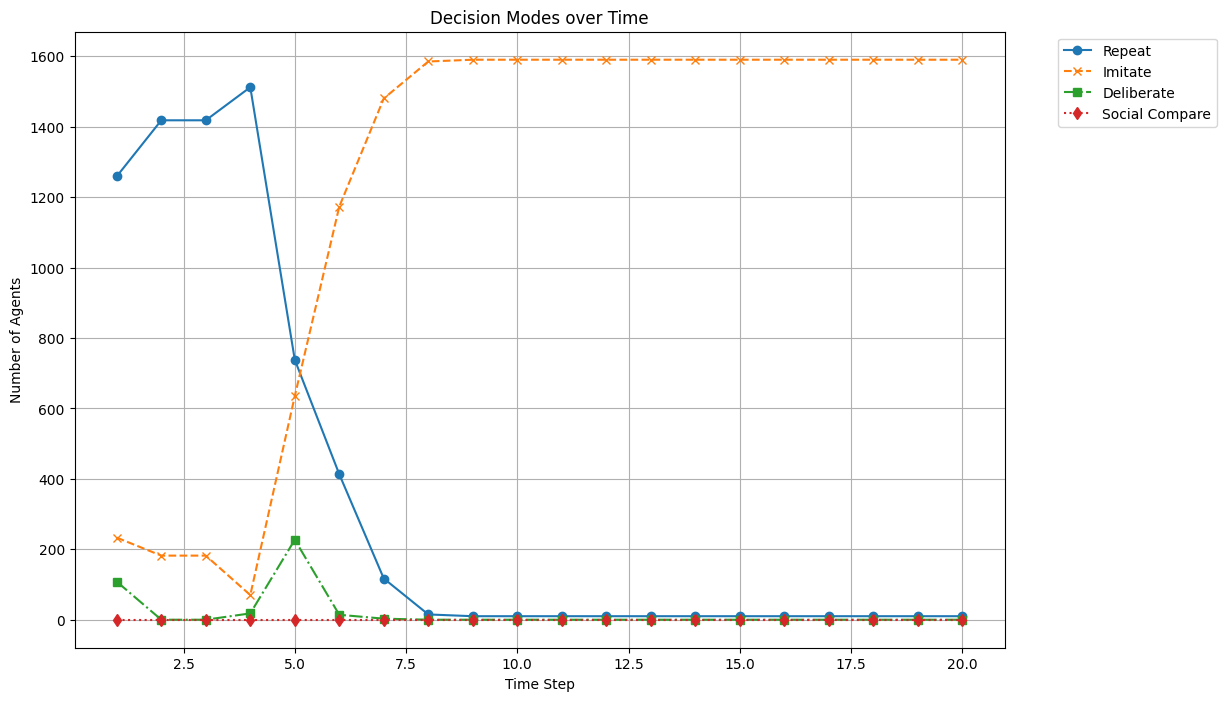

In [35]:
model_data = model.datacollector.get_agent_vars_dataframe()
decision_modes_count = model_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
print(decision_modes_count)

# Plot the decision modes count over time
plt.figure(figsize=(12, 8))
plt.plot(decision_modes_count.index, decision_modes_count['Repeat'], label='Repeat', linestyle='-', marker='o')
plt.plot(decision_modes_count.index, decision_modes_count['Imitate'], label='Imitate', linestyle='--', marker='x')
plt.plot(decision_modes_count.index, decision_modes_count['Deliberate'], label='Deliberate', linestyle='-.', marker='s')
plt.plot(decision_modes_count.index, decision_modes_count['Social_Compare'], label='Social Compare', linestyle=':', marker='d')
plt.title('Decision Modes over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Distribution of agent attributes:

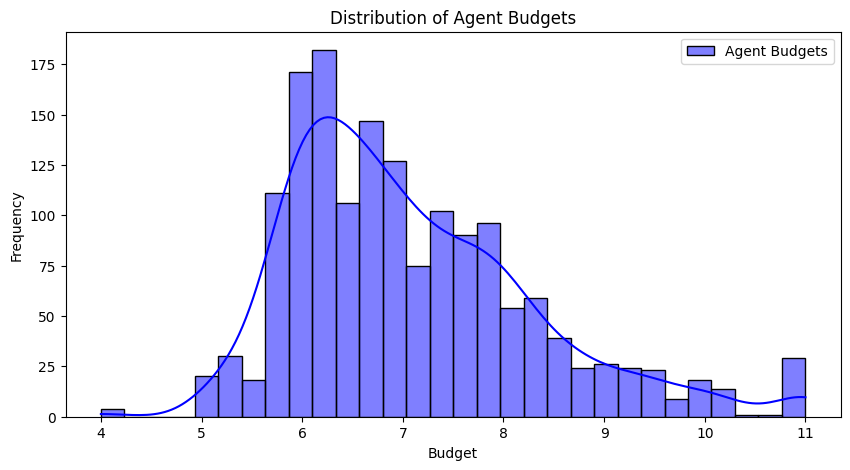

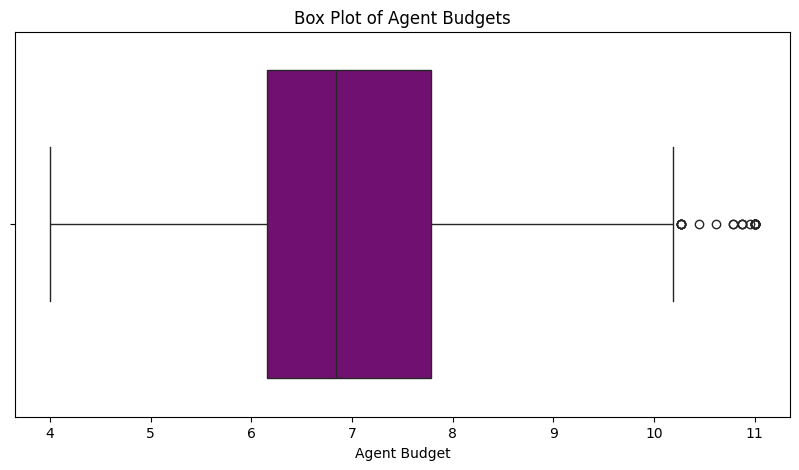

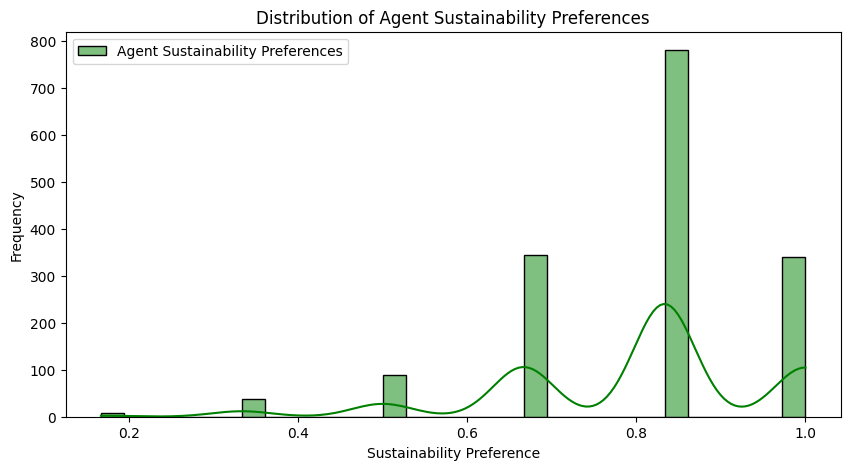

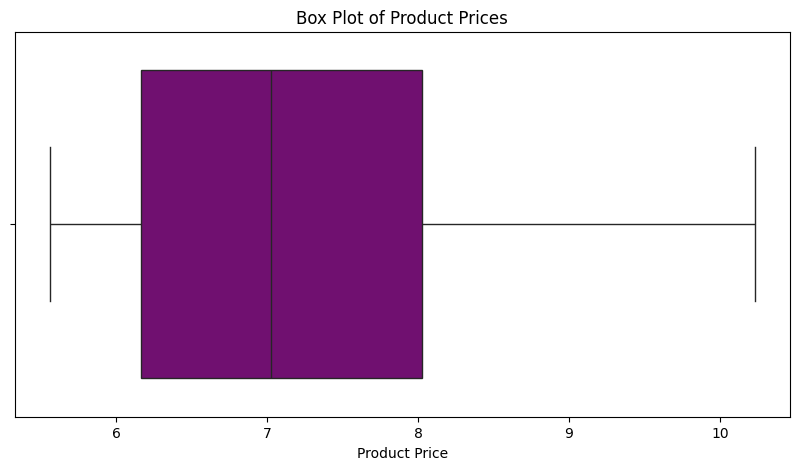

In [9]:
# Collect agent attributes
agent_budgets = [agent.budget for agent in model.agents]
agent_sustainability_preferences = [agent.preference_sustainability for agent in model.agents]

# Visualization code here
# Plot for Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_budgets, bins=30, kde=True, color='blue', label='Agent Budgets')
plt.title('Distribution of Agent Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(x=agent_budgets, color='purple')
plt.title('Box Plot of Agent Budgets')
plt.xlabel('Agent Budget')
plt.show()


# Plot for Sustainability Preferences Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_sustainability_preferences, bins=30, kde=True, color='green', label='Agent Sustainability Preferences')
plt.title('Distribution of Agent Sustainability Preferences')
plt.xlabel('Sustainability Preference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Collect product prices
product_prices = [product.normal_price for product in model.products]


# Plot a box plot for product prices
plt.figure(figsize=(10, 5))
sns.boxplot(x=product_prices, color='purple')
plt.title('Box Plot of Product Prices')
plt.xlabel('Product Price')
plt.show()



### Multiple runs of the same model:

Income Distribution (Transformed):
count    75.000000
mean      7.826667
std       1.947638
min       4.000000
25%       6.285714
50%       7.871429
75%       9.457143
max      11.000000
Name: Transformed Income, dtype: float64
Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.325597608081521, 8.170966178133064, 7.0786193338679135, 6.451748457454554, 8.905883852508103, 5.346499354007632, 6.425643829048164, 5.90214533912303, 6.835116620000304, 7.23476558740023]
Sampled Budgets:
count    1000.000000
mean        7.119714
std         1.227134
min         4.000000
25%         6.242857
50%         6.842857
75%         7.785714
max        11.000000
dtype: float64
Income Distribution (Transformed):
count    75.000000
mean      7.826667
std       1.947638
min       4.000000
25%       6.285714
50%       7.871429
75%       9.457143
max      

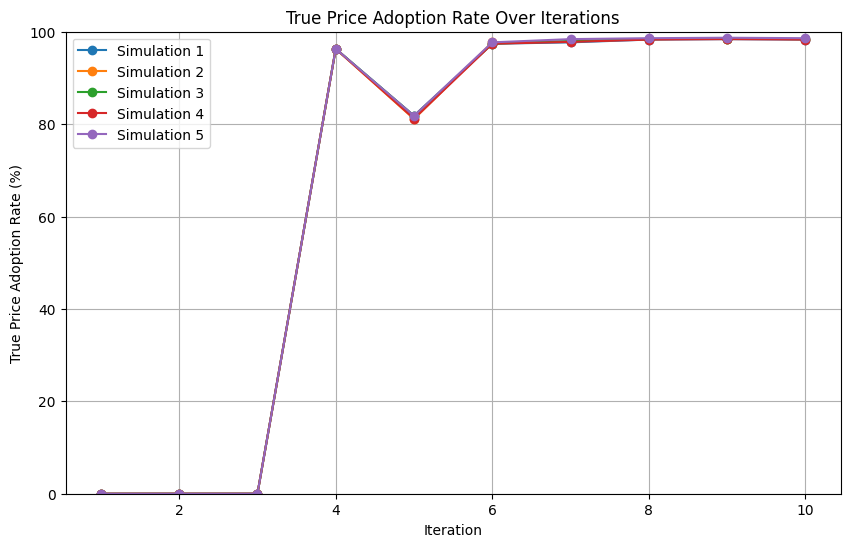

In [10]:

base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}

# Number of simulations
num_simulations = 5

# Number of steps per simulation
num_steps = 10

# Function to run the simulation and return adoption rates over steps
def run_simulation(model, num_steps):
    adoption_rates = []
    for _ in range(num_steps):
        model.step()
        model_data = model.datacollector.get_model_vars_dataframe()
        adoption_rate = model_data['True_Price_Adoption_Rate'].iloc[-1]
        adoption_rates.append(adoption_rate)
    return adoption_rates

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over the number of simulations
for simulation in range(num_simulations):
    # Initialize your model
    model = ConsumatModel(base_config)
    
    # Run the model for a specified number of steps and collect adoption rates
    adoption_rates = run_simulation(model, num_steps)
    
    # Plotting the results for the current simulation
    plt.plot(range(1, num_steps + 1), adoption_rates, marker='o', label=f'Simulation {simulation + 1}')

# Finalizing the plot
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()


### Vary True Price percentage

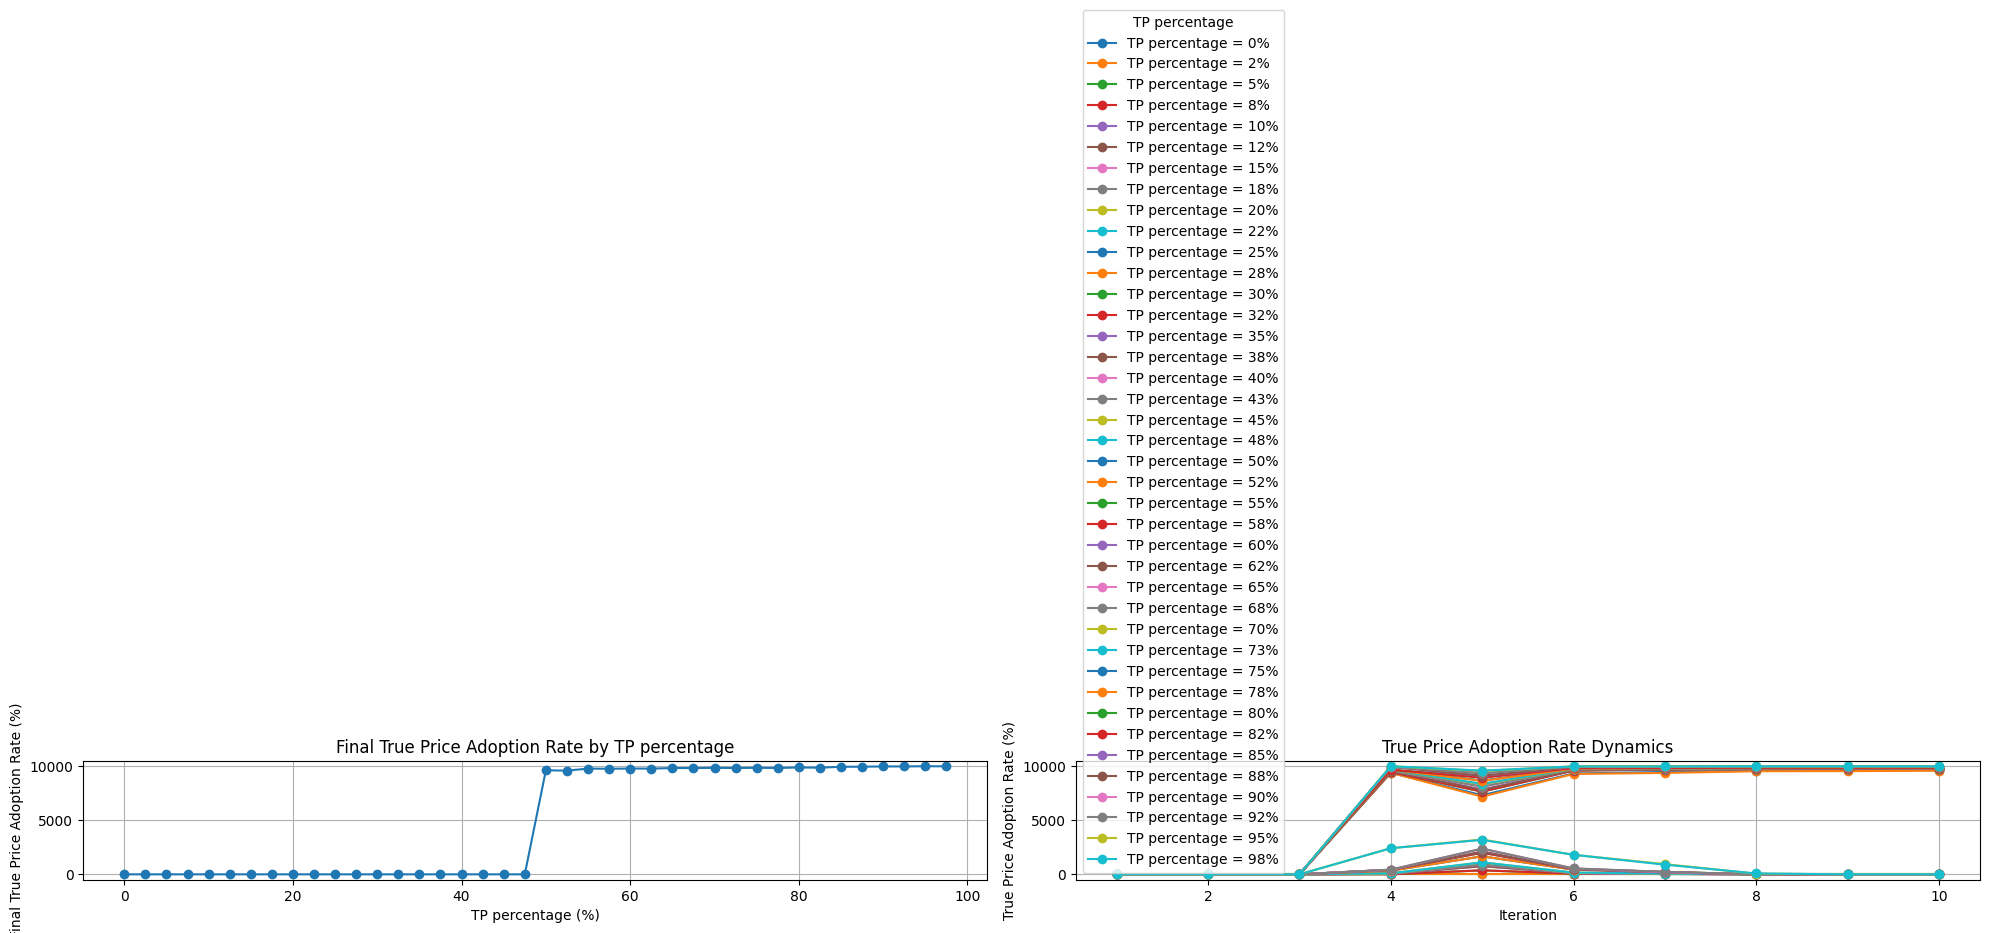

In [33]:
base_config = {
    'TP_percentage': 0.6,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1600, 
    'seed': 42  # Seed for reproducibility
}

def run_simulation(model, num_steps):
    adoption_rates = []
    for _ in range(num_steps):
        model.step()
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)
    return adoption_rates

# Define TP percentages and simulation steps
tp_percentages = np.arange(0, 1.00, 0.025)

num_steps = 10

# Prepare figure for plotting
plt.figure(figsize=(20, 6))

# Store final adoption rates and all adoption rates for plotting
final_adoption_rates = []
all_adoption_rates = []

# Run the simulation for each TP_percentage
for tp_percentage in tp_percentages:
    base_config['TP_percentage'] = tp_percentage
    model = ConsumatModel(base_config)
    adoption_rates = run_simulation(model, num_steps)
    
    # Collect data for the plots
    final_adoption_rates.append(adoption_rates[-1])
    all_adoption_rates.append(adoption_rates)

tp_percentages_percent = tp_percentages * 100

# Plot 1: Final Adoption Rate by TP_percentage
plt.subplot(1, 2, 1)
plt.plot(tp_percentages_percent, np.array(final_adoption_rates) * 100, marker='o')
plt.title('Final True Price Adoption Rate by TP percentage')
plt.xlabel('TP percentage (%)')
plt.ylabel('Final True Price Adoption Rate (%)')
plt.grid(True)

# Plot 2: Adoption Rate Dynamics by TP_percentage
plt.subplot(1, 2, 2)
for i, rates in enumerate(all_adoption_rates):
    plt.plot(range(1, num_steps + 1), np.array(rates) * 100, label=f'TP percentage = {tp_percentages_percent[i]:.0f}%', marker='o')

plt.title('True Price Adoption Rate Dynamics')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title='TP percentage')
plt.grid(True)

plt.tight_layout()
plt.show()


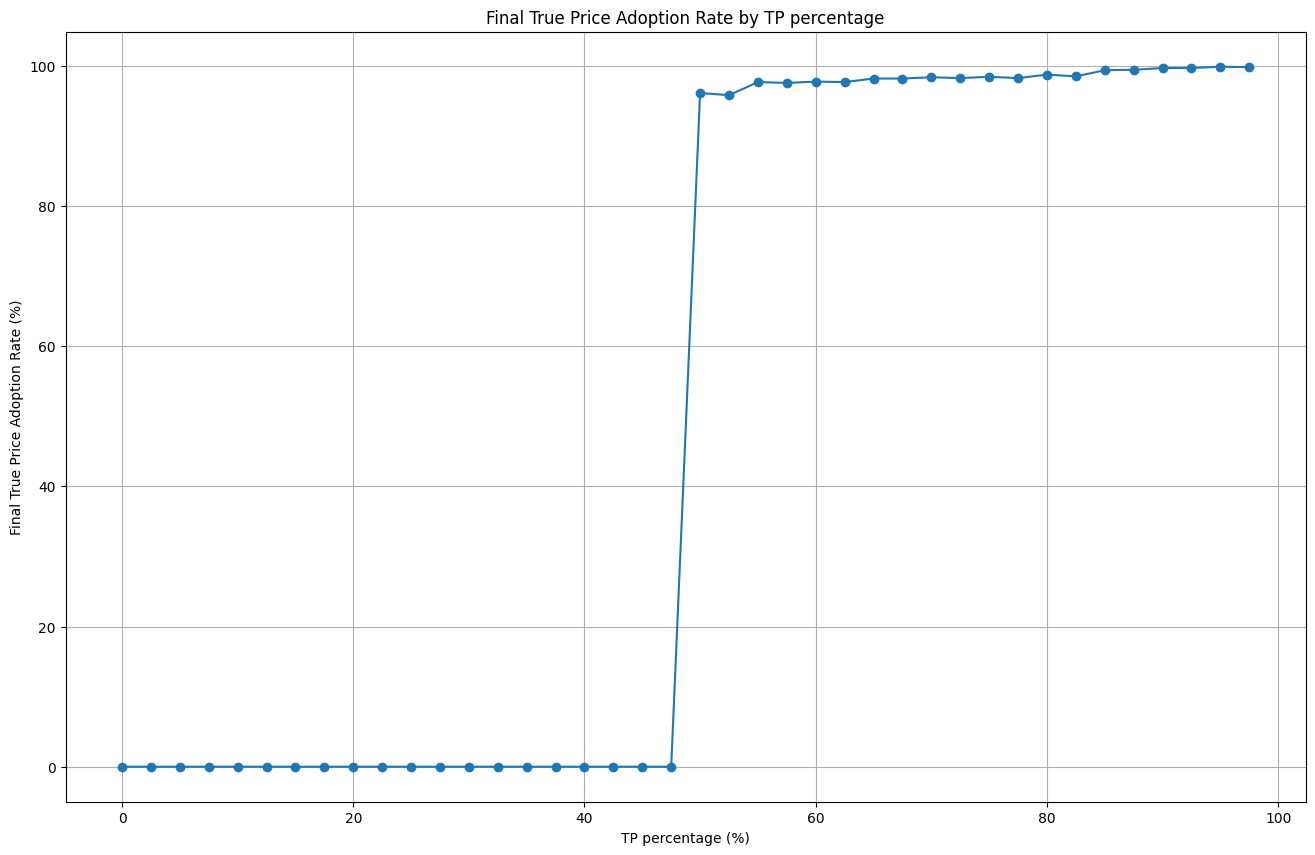

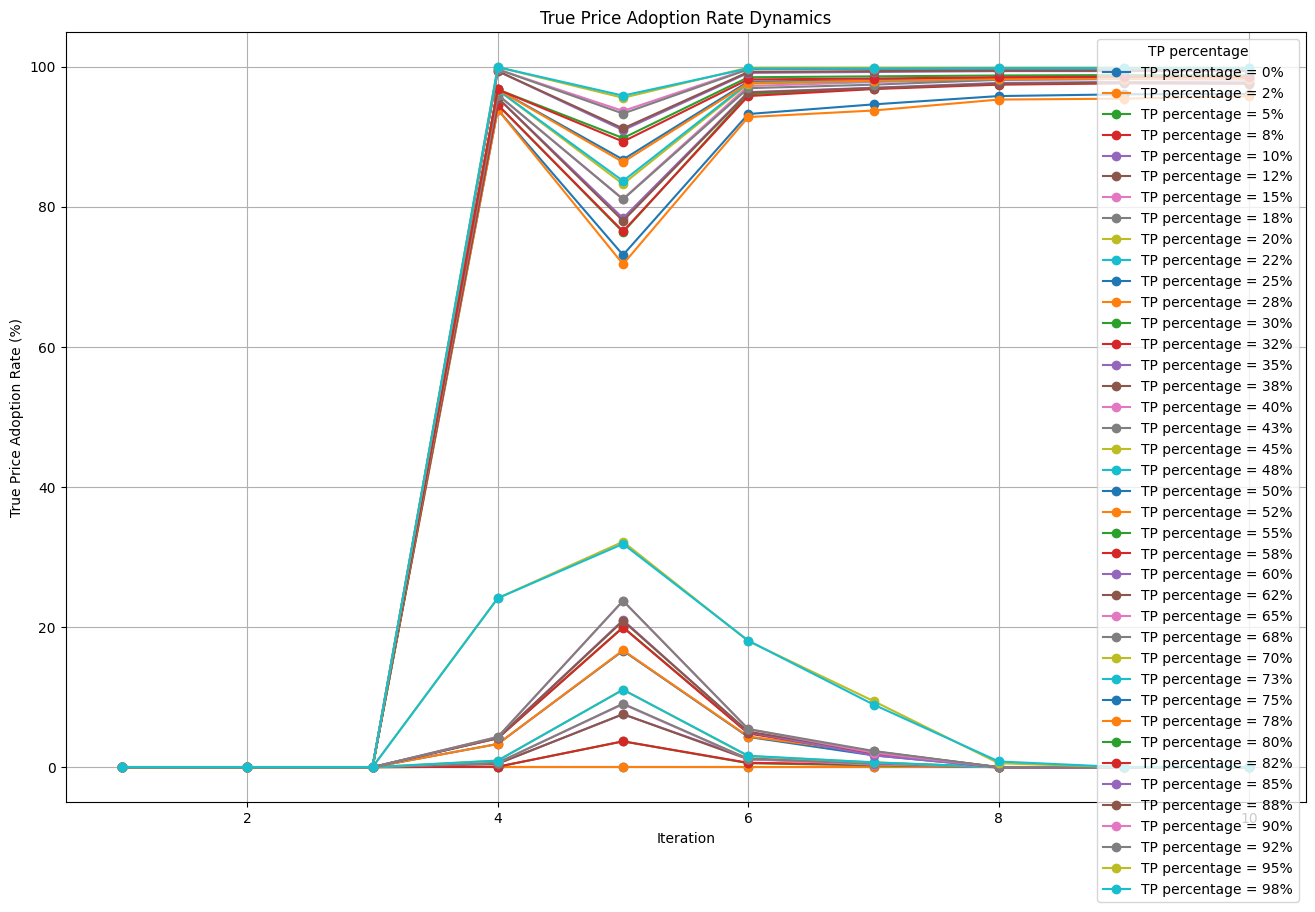

In [34]:
# Plot 1: Final Adoption Rate by TP_percentage
plt.figure(figsize=(16, 10))
plt.plot(tp_percentages_percent, np.array(final_adoption_rates), marker='o')
plt.title('Final True Price Adoption Rate by TP percentage')
plt.xlabel('TP percentage (%)')
plt.ylabel('Final True Price Adoption Rate (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 10))
for i, rates in enumerate(all_adoption_rates):
    plt.plot(range(1, num_steps + 1), np.array(rates), label=f'TP percentage = {tp_percentages_percent[i]:.0f}%', marker='o')

plt.title('True Price Adoption Rate Dynamics')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title='TP percentage')
plt.grid(True)
plt.show()


Simulation Progress: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


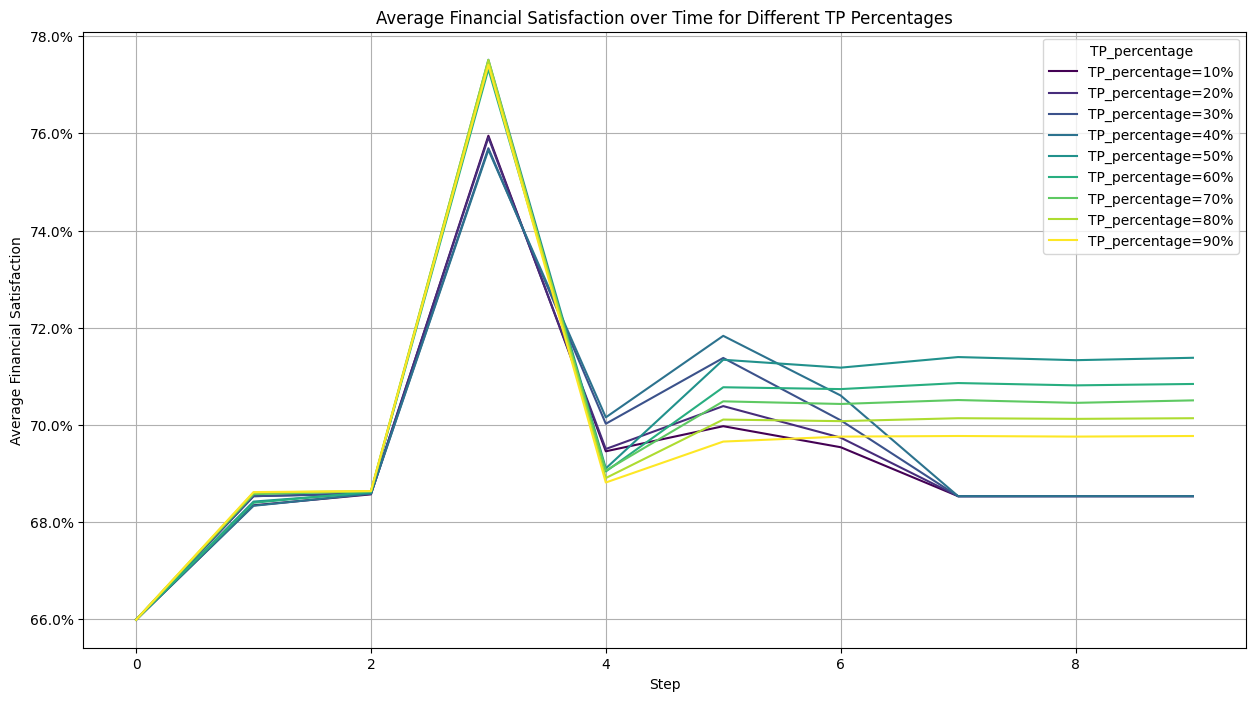

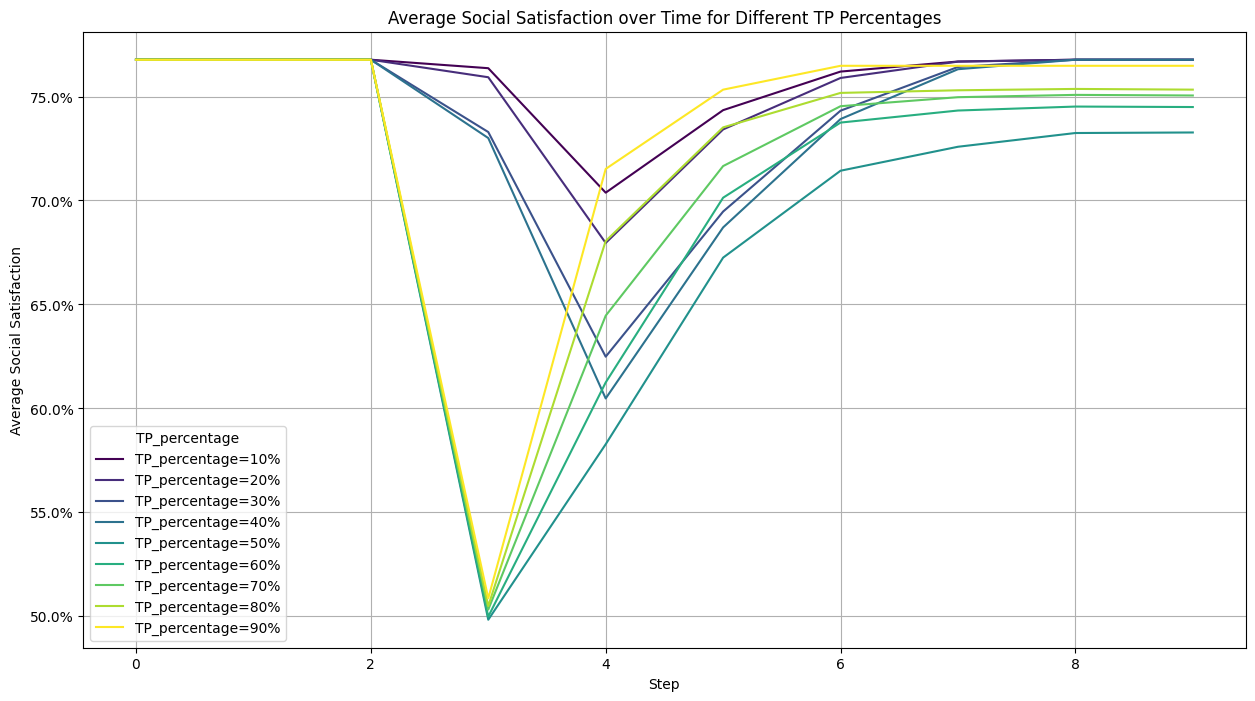

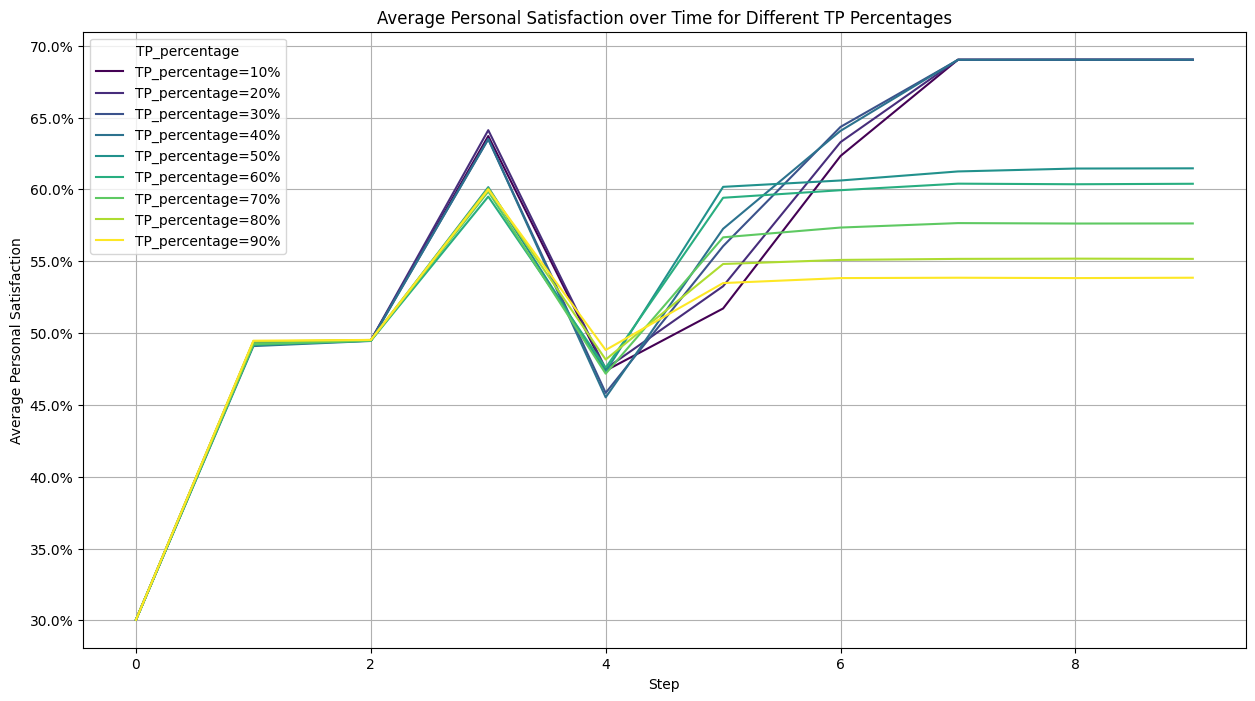

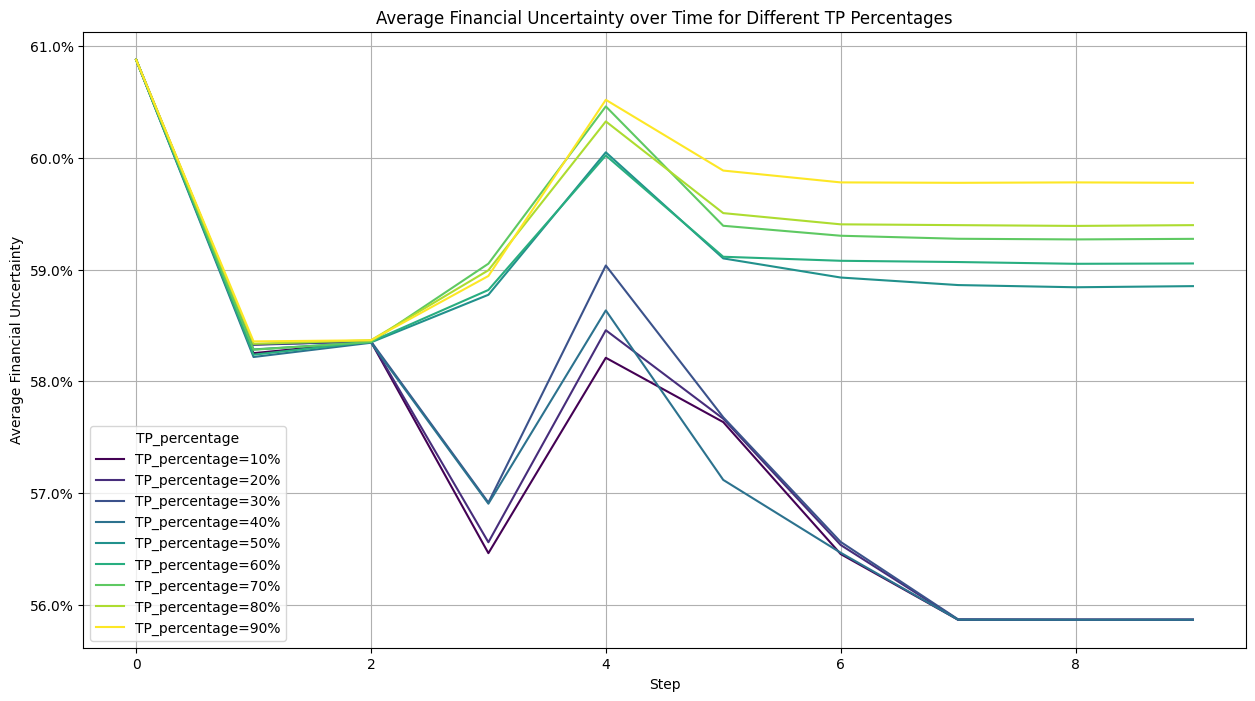

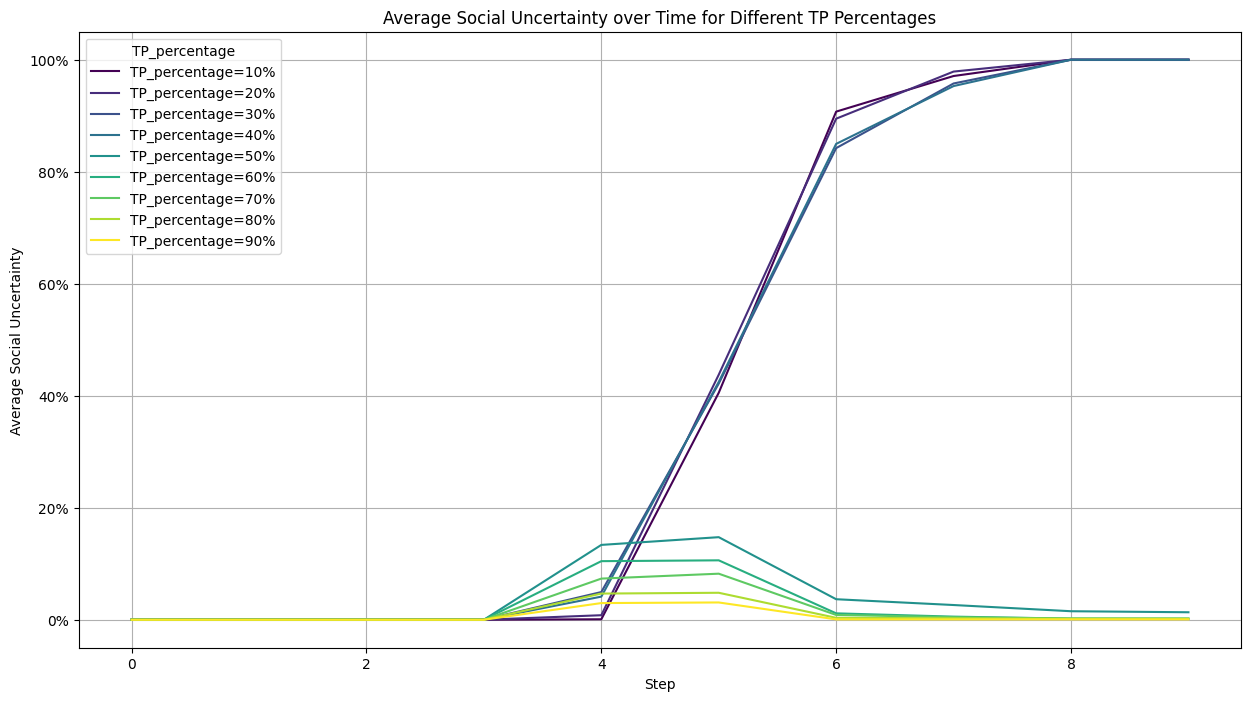

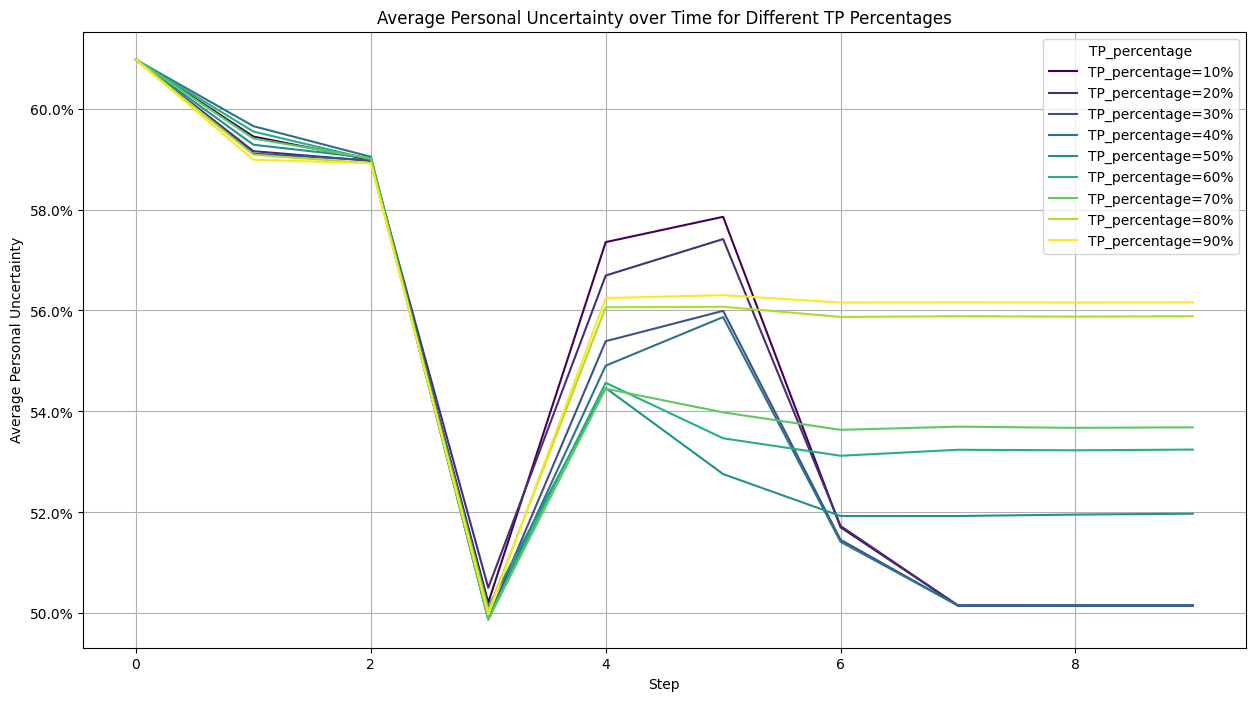

In [58]:
import matplotlib.ticker as mtick


def collect_simulation_data(model, num_steps):
    # List to store collected data
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    # Run the model for a specified number of steps with tqdm for progress tracking
    for step in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Collect data from the model
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    # Convert the collected data to a DataFrame
    model_data = pd.DataFrame(collected_data)

    return model_data

tp_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_steps = 10
all_results = {}

for tp in tp_percentages:
    base_config['TP_percentage'] = tp
    model = ConsumatModel(base_config)
    model_data = collect_simulation_data(model, num_steps)
    all_results[tp] = model_data

def plot_metric(all_results, metric, ylabel, scale_as_percentage=False):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(all_results)))

    for tp, color in zip(all_results.keys(), colors):
        data = all_results[tp]
        if scale_as_percentage:
            plt.plot(data['Step'], data[metric] * 100, label=f'TP_percentage={tp * 100:.0f}%', color=color)
        else:
            plt.plot(data['Step'], data[metric], label=f'TP_percentage={tp * 100:.0f}%', color=color)

    plt.xlabel('Step')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} over Time for Different TP Percentages')
    plt.legend(title='TP_percentage')
    plt.grid(True)

    if scale_as_percentage:
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

# Plotting
plot_metric(all_results, 'Avg_F_Satisfaction', 'Average Financial Satisfaction', scale_as_percentage=True)
plot_metric(all_results, 'Avg_S_Satisfaction', 'Average Social Satisfaction', scale_as_percentage=True)
plot_metric(all_results, 'Avg_P_Satisfaction', 'Average Personal Satisfaction', scale_as_percentage=True)
plot_metric(all_results, 'Avg_F_Uncertainty', 'Average Financial Uncertainty', scale_as_percentage=True)
plot_metric(all_results, 'Avg_S_Uncertainty', 'Average Social Uncertainty', scale_as_percentage=True)
plot_metric(all_results, 'Avg_P_Uncertainty', 'Average Personal Uncertainty', scale_as_percentage=True)

## Global Sensitivity Analysis

Sobol indices

Saltelli sampling


Version 2

In [37]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['TP_percentage', 'satisfaction_threshold', 'uncertainty_threshold'],
    'bounds': [[0, 1],    # TP_percentage
               [0, 1],    # satisfaction_threshold
               [0, 1]]    # uncertainty_threshold
}

# Number of samples
num_samples = 256

# Generate samples
param_values = saltelli.sample(problem, num_samples)

def collect_simulation_data(model, num_steps):
    collected_data = {
        'Step': [],
        'Adoption Rate': [],
        'Avg_F_Satisfaction': [],
        'Avg_S_Satisfaction': [],
        'Avg_P_Satisfaction': [],
        'Avg_F_Uncertainty': [],
        'Avg_S_Uncertainty': [],
        'Avg_P_Uncertainty': []
    }

    for step in range(num_steps):
        model.step()
        collected_data['Step'].append(step)
        collected_data['Adoption Rate'].append(model.calculate_true_price_adoption_rate())
        collected_data['Avg_F_Satisfaction'].append(np.mean([agent.F_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_S_Satisfaction'].append(np.mean([agent.S_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_P_Satisfaction'].append(np.mean([agent.P_satisfaction for agent in model.schedule.agents]))
        collected_data['Avg_F_Uncertainty'].append(np.mean([agent.F_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_S_Uncertainty'].append(np.mean([agent.S_uncertainty for agent in model.schedule.agents]))
        collected_data['Avg_P_Uncertainty'].append(np.mean([agent.P_uncertainty for agent in model.schedule.agents]))

    model_data = pd.DataFrame(collected_data)
    return model_data

def run_single_simulation(params, base_config, num_steps):
    config = base_config.copy()
    config['TP_percentage'] = params[0]
    config['satisfaction_threshold'] = params[1]
    config['uncertainty_threshold'] = params[2]
    model = ConsumatModel(config)
    model_data = collect_simulation_data(model, num_steps)
    # Store the final step's data for sensitivity analysis
    final_step_data = model_data.iloc[-1]
    return [
        final_step_data['Adoption Rate'],
        final_step_data['Avg_F_Satisfaction'],
        final_step_data['Avg_S_Satisfaction'],
        final_step_data['Avg_P_Satisfaction'],
        final_step_data['Avg_F_Uncertainty'],
        final_step_data['Avg_S_Uncertainty'],
        final_step_data['Avg_P_Uncertainty']
    ]

num_steps = 10

# Run simulations in parallel
all_results = Parallel(n_jobs=-1)(
    delayed(run_single_simulation)(params, base_config, num_steps)
    for params in tqdm(param_values, desc='Running simulations')
)

all_results = np.array(all_results)

# Save results to a CSV file
results_df = pd.DataFrame(all_results, columns=[
    'Adoption Rate',
    'Avg_F_Satisfaction',
    'Avg_S_Satisfaction',
    'Avg_P_Satisfaction',
    'Avg_F_Uncertainty',
    'Avg_S_Uncertainty',
    'Avg_P_Uncertainty'
])
results_df.to_csv('sensitivity_analysis_results.csv', index=False)

# Perform Sobol sensitivity analysis
sensitivity_results = {}
for i, output in enumerate(['Adoption Rate', 'Avg_F_Satisfaction', 'Avg_S_Satisfaction', 'Avg_P_Satisfaction', 'Avg_F_Uncertainty', 'Avg_S_Uncertainty', 'Avg_P_Uncertainty']):
    Si = sobol.analyze(problem, all_results[:, i], print_to_console=True)
    sensitivity_results[output] = Si
    print(f'Sensitivity analysis for {output}:')
    print(Si)

# Save sensitivity analysis results
for key, Si in sensitivity_results.items():
    pd.DataFrame(Si.to_df()).to_csv(f'sensitivity_analysis_{key}.csv', index=False)


/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_51967/775692210.py:22: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, num_samples)
Running simulations:   0%|          | 9/2048 [00:01<05:10,  6.56it/s]

Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.325597608081521, 8.170966178133064, 7.0786193338679135, 6.451748457454554, 8.905883852508103, 5.346499354007632, 6.425643829048164, 5.90214533912303, 6.835116620000304, 7.23476558740023]
Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.325597608081521, 8.170966178133064, 7.0786193338679135, 6.451748457454554, 8.905883852508103, 5.346499354007632, 6.425643829048164, 5.90214533912303, 6.835116620000304, 7.23476558740023]
Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.32

Running simulations:   1%|          | 16/2048 [01:09<3:20:38,  5.92s/it]

Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.325597608081521, 8.170966178133064, 7.0786193338679135, 6.451748457454554, 8.905883852508103, 5.346499354007632, 6.425643829048164, 5.90214533912303, 6.835116620000304, 7.23476558740023]
Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.325597608081521, 8.170966178133064, 7.0786193338679135, 6.451748457454554, 8.905883852508103, 5.346499354007632, 6.425643829048164, 5.90214533912303, 6.835116620000304, 7.23476558740023]
Product Costs:
[9.614381948503636, 6.999025114201697, 5.930839833836315, 9.837317305467552, 5.661898476902179, 6.699379232903285, 5.712813636623608, 7.927710778909143, 5.554362614158917, 6.482175281653965, 8.32

KeyboardInterrupt: 